In [1]:
import pandas as pd

In [39]:
# Create dataframe from cleaned data
clean_data = pd.read_csv("../Resources/drug_death_data_clean.csv")
clean_data.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Benzodiazepine,Methadone,Amphetamine,Tramad,Morphine Not Heroin,Hydromorphone,Other,OpiateNOS,Any Opioid,MannerofDeath
0,1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
1,2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident
2,3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident
3,4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
4,5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident


In [40]:
# Check columns for drugs
clean_data.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphetamine', 'Tramad', 'Morphine Not Heroin',
       'Hydromorphone', 'Other', 'OpiateNOS', 'Any Opioid', 'MannerofDeath'],
      dtype='object')

In [41]:
# Create subset df of just drug columns
drugs = clean_data.loc[:,["Heroin","Cocaine", 'Fentanyl', 'Fentanyl Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphetamine', 'Tramad', 'Morphine Not Heroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'Any Opioid']]
drugs.head()

,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramad,Morphine Not Heroin,Hydromorphone,Other,OpiateNOS,Any Opioid
0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Create new column to store which drugs were found at death.
fatal_drug = [[] for i in range(len(clean_data))]
for i in range(len(drugs)):
    for col in drugs:
        if drugs[col][i] == 'Y':
            fatal_drug[i].append(col)

In [43]:
clean_data["Fatal Drug"] = fatal_drug
clean_data

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Methadone,Amphetamine,Tramad,Morphine Not Heroin,Hydromorphone,Other,OpiateNOS,Any Opioid,MannerofDeath,Fatal Drug
0,1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,[Cocaine]
1,2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"[Heroin, Cocaine, Any Opioid]"
2,3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Accident,"[Heroin, Fentanyl, Any Opioid]"
3,4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,[Fentanyl]
4,5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,[Heroin]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"[Ethanol, Benzodiazepine]"
4916,5101,17-0618,07/22/2017 12:00:00 AM,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"[Heroin, Benzodiazepine]"
4917,5102,18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,...,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Accident,"[Heroin, Fentanyl, Fentanyl Analogue, Tramad, ..."
4918,5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,[Fentanyl]


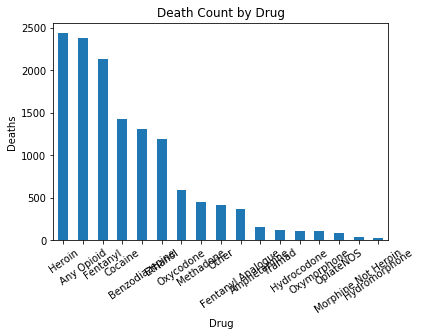

In [50]:
drugs_count = drugs.count()
drugs_count = drugs_count.sort_values(ascending=False)
drug_plot = drugs_count.plot(kind='bar')
drug_plot.set_title("Death Count by Drug")
drug_plot.set_xlabel("Drug")
drug_plot.set_ylabel("Deaths")
drug_plot.set_xticklabels(drugs_count.index,rotation=35)
drug_plot